## **Ejercicio 1: Crear el Diccionario (Encoder y Decoder)**

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# Ajustes estéticos para las gráficas
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

El primer paso para cualquier automatización de texto es crear un mapa. La computadora no sabe qué es "Hola", pero sabe qué es el número 1. Aquí creamos ese puente.

In [3]:
# (CORPUS)
texto = [ 'Todo lo que somos es el resultado de lo que hemos pensado',
          'Ser o no ser esa es la cuestion',
          'Se tu mismo todos los demas ya estan ocupados' ]

In [4]:
# 1. Limpieza y Tokenización
# Unimos el texto, lo pasamos a minúsculas y separamos por espacios
todas_palabras = re.split(r'\s', ' '.join(texto).lower())

In [5]:
# 2. Crear el Vocabulario
# 'set' elimina duplicados, 'sorted' ordena alfabéticamente
vocabulario = sorted(set(todas_palabras))

In [6]:
# 3. Crear los diccionarios (El Mapa)
# De Palabra a Número (Encoder)
palabra2idx = { palabra:i for i,palabra in enumerate(vocabulario) }

In [7]:
# De Número a Palabra (Decoder)
idx2palabra = { i:palabra for i,palabra in enumerate(vocabulario) }

In [8]:
# Ver el resultado
print(f"Vocabulario ({len(vocabulario)} palabras):")
print(vocabulario)
print("\nEjemplo de mapa (palabra2idx):")
print(palabra2idx)

Vocabulario (25 palabras):
['cuestion', 'de', 'demas', 'el', 'es', 'esa', 'estan', 'hemos', 'la', 'lo', 'los', 'mismo', 'no', 'o', 'ocupados', 'pensado', 'que', 'resultado', 'se', 'ser', 'somos', 'todo', 'todos', 'tu', 'ya']

Ejemplo de mapa (palabra2idx):
{'cuestion': 0, 'de': 1, 'demas': 2, 'el': 3, 'es': 4, 'esa': 5, 'estan': 6, 'hemos': 7, 'la': 8, 'lo': 9, 'los': 10, 'mismo': 11, 'no': 12, 'o': 13, 'ocupados': 14, 'pensado': 15, 'que': 16, 'resultado': 17, 'se': 18, 'ser': 19, 'somos': 20, 'todo': 21, 'todos': 22, 'tu': 23, 'ya': 24}


# **Explicación:**

**todas_palabras:** Es una lista gigante con cada palabra que aparece en tus textos.

*vocabulario:* Es la lista "limpia". Aquí definimos las palabras únicas que nuestro sistema conoce. Si una palabra no está aquí, el sistema no la entenderá.

*palabra2idx:* Es el traductor. Le das "ser" y te devuelve 22 (por ejemplo).

# **Ejercicio 2:** Empaquetar en Funciones
Para no repetir código, creamos funciones reutilizables. Esto es lo que usarías en tu backend para procesar los leads de Instagram automáticamente.

In [9]:
# Función CODIFICADOR: Texto -> Números
def codificador(texto_entrada):
  # 1. Separar y limpiar
  palabras = re.split(r'\s', texto_entrada.lower())
  # 2. Convertir a números (solo si la palabra existe en nuestro vocabulario)
  vector_numeros = [palabra2idx[p] for p in palabras if p in palabra2idx]
  return vector_numeros

In [10]:
# Función DECODIFICADOR: Números -> Texto
def decodificador(indices):
  # 1. Buscar la palabra de cada número y unirlas con espacios
  return ' '.join([idx2palabra[i] for i in indices])

In [11]:
# --- PRUEBA ---
# Creamos una frase nueva (usando palabras que sabemos que existen)
nuevo_texto = 'todos somos el resultado de lo que hemos pensado'

In [12]:
token_ids = codificador(nuevo_texto)
texto_decodificado = decodificador(token_ids)

print('Texto Original:')
print(f'\t{nuevo_texto}')
print('\nToken IDs (Lo que ve la computadora):')
print(f'\t{token_ids}')
print('\nTexto Reconstruido:')
print(f'\t{texto_decodificado}')

Texto Original:
	todos somos el resultado de lo que hemos pensado

Token IDs (Lo que ve la computadora):
	[22, 20, 3, 17, 1, 9, 16, 7, 15]

Texto Reconstruido:
	todos somos el resultado de lo que hemos pensado


**Explicación:**

**codificador:** Toma el mensaje del usuario y lo convierte en una secuencia numérica.

Validación if p in palabra2idx: Esto es crucial. Evita que el programa se rompa si el usuario escribe una palabra desconocida.

# **Ejercicio 3**: Visualizar los Tokens
A veces es útil ver visualmente cómo se distribuyen las palabras en el texto.

In [13]:
# Convertimos TODO el texto original a números
texto_completo_str = ' '.join(texto).lower()
tokens = codificador(texto_completo_str)

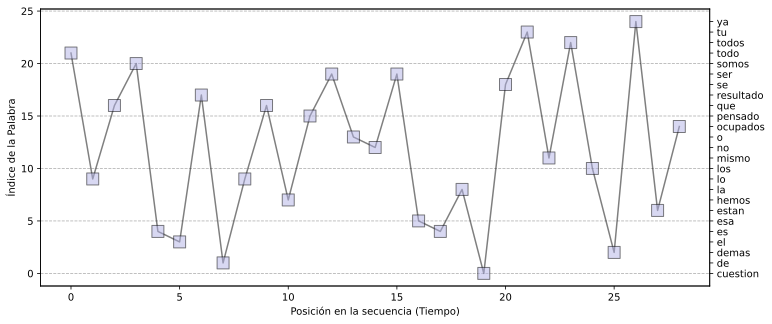

In [14]:
# Preparamos la gráfica
fig, ax = plt.subplots(1, figsize=(12,5))

# Graficamos los tokens
# Eje X = Tiempo (orden de palabras), Eje Y = Índice de la palabra
ax.plot(tokens, 'ks-', markersize=12, markerfacecolor=[.7,.7,.9], alpha=0.5)

ax.set_ylabel('Índice de la Palabra')
ax.set_xlabel('Posición en la secuencia (Tiempo)')
ax.grid(linestyle='--', axis='y')

# Truco: Poner las palabras reales en el eje derecho para entender la gráfica
ax2 = ax.twinx()
ax2.plot(tokens, alpha=0) # Gráfica invisible solo para configurar el eje
ax2.set_yticks(range(len(vocabulario)))
ax2.set_yticklabels(vocabulario)
ax2.set_ylim(ax.get_ylim()) # Sincronizar límites

plt.show()

**Explicación:**

Esta gráfica muestra la "melodía" del texto. Los picos y valles representan diferentes palabras. Si se repite mucho una palabra, verás que la línea vuelve siempre a la misma altura horizontal.

# **Ejercicio 4:** Explorar el Contexto (N-Grams)
Para entender el significado, necesitamos ver qué palabras rodean a otras. Por ejemplo, saber qué viene después de "ser".

In [15]:
# Palabra objetivo a investigar
palabra_objetivo = 'ser'
indice_objetivo = palabra2idx[palabra_objetivo]

# Encontrar DÓNDE aparece esa palabra (sus posiciones)
# np.where nos devuelve los índices donde se cumple la condición
locaciones = np.where(np.array(tokens) == indice_objetivo)[0]

print(f'La palabra "{palabra_objetivo}" aparece en los índices {locaciones}\n')

# Imprimir el contexto (la palabra anterior y la siguiente)
print(f"Contexto de '{palabra_objetivo}':")
for t in locaciones:
  # Tomamos una ventana: [anterior, actual, siguiente]
  tokens_contexto = tokens[t-1 : t+2]
  frase_contexto = decodificador(tokens_contexto)

  print(f"  Indices: {tokens_contexto} -> Frase: ... {frase_contexto} ...")

La palabra "ser" aparece en los índices [12 15]

Contexto de 'ser':
  Indices: [15, 19, 13] -> Frase: ... pensado ser o ...
  Indices: [12, 19, 5] -> Frase: ... no ser esa ...


**Explicación:**

**Contexto:** Las IAs no leen palabra por palabra aislada, leen "ventanas". Aquí estamos viendo una ventana de tamaño 3 (la palabra objetivo + 1 a cada lado). Esto ayuda a desambiguar significados.

# **# Ejercicio 5: One-Hot Encoding (Matriz)**
Finalmente, transformamos las palabras en una estructura matemática pura: una matriz de ceros y unos.

La matriz One-hot tiene un tamaño de (29, 25)



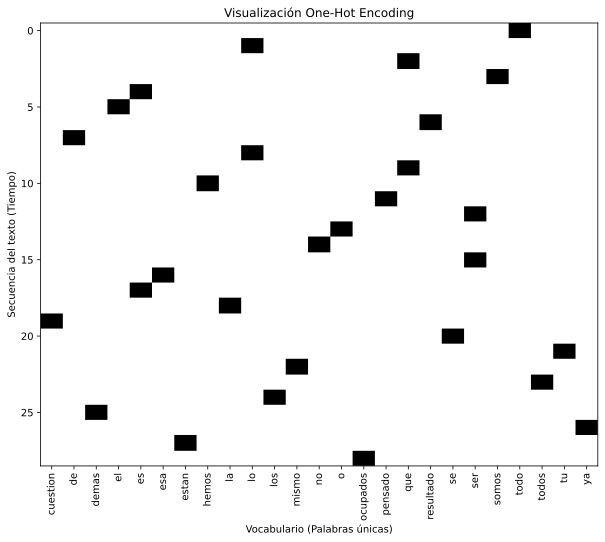

In [16]:
# Crear una matriz de ceros
# Tamaño: (Cantidad total de palabras) x (Tamaño del vocabulario único)
matriz_palabras = np.zeros((len(todas_palabras), len(vocabulario)), dtype=int)

# Rellenar la matriz
for i, palabra in enumerate(todas_palabras):
  columna_idx = palabra2idx[palabra]
  matriz_palabras[i, columna_idx] = 1

print(f'La matriz One-hot tiene un tamaño de {matriz_palabras.shape}\n')
# print(matriz_palabras) # Descomentar para ver los ceros y unos numéricos

# Visualizar la matriz como una imagen
fig, ax = plt.subplots(1, figsize=(10,8))

# 'imshow' dibuja matrices como mapas de calor
plt.imshow(matriz_palabras, cmap='Greys', origin='upper', aspect='auto')

ax.set_title("Visualización One-Hot Encoding")
ax.set_xlabel('Vocabulario (Palabras únicas)')
ax.set_ylabel('Secuencia del texto (Tiempo)')

# Poner las palabras en el eje X para leerlo
ax.set_xticks(range(len(vocabulario)))
ax.set_xticklabels(vocabulario, rotation=90)

plt.show()

Explicación:

Matriz One-Hot: Es como un tablero de control.

Cada Fila es un paso en el tiempo (palabra 1, palabra 2, palabra 3...).

Cada Columna es una palabra posible del diccionario.

El cuadrito negro (1) indica qué palabra se "encendió" en ese momento.

Esta matriz es lo que realmente se alimenta a una red neuronal básica para entrenarla.